### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ
#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

# ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3
# Задача кластеризации
### Дисциплина: Интеллектуальный анализ данных


##### Студент:  Пономарева Л. М.
##### Группа:   НПИбд-02-19

### Москва 2022

#### Вариант 29 

Steel Plates Faults Data Set 

Название файла: Faults.NNA 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Steel+Plates+Faults 

Первый признак: Edges_Index (столбец No 15) 

Второй признак: Empty_Index (столбец No 16) 

Класс: Pastry (столбец No 28) 

Алгоритмы: K-means, Affinity Propagation, Mean Shift, mini-batch K-Means 

Меры качества: F-мера, парные меры TP, FN, FP, TN, индекс Жаккара 

Найти лучший алгоритм кластеризации относительно меры качества: индекс Жаккара 

##### Задание 1
Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса. 


In [1]:
import pandas as pd

my_data = pd.read_csv( "https://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults.NNA", sep='\t', header = None)
my_data = my_data[[14, 15, 27]]
my_data.columns = ['Edges_Index', 'Empty_Index', 'Pastry']
my_data

,Edges_Index,Empty_Index,Pastry
0,0.0498,0.2415,1
1,0.7647,0.3793,1
2,0.9710,0.3426,1
3,0.7287,0.4413,1
4,0.0695,0.4486,1
...,...,...,...
1936,0.3662,0.3906,0
1937,0.2118,0.4554,0
1938,0.2132,0.3287,0
1939,0.2015,0.5904,0


##### Задание 2 
Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.

Проверка на наличие нечисловых (пропущенных) значений:

In [3]:
print(my_data['Edges_Index'].dtype)
print(my_data['Empty_Index'].dtype)

float64
float64


In [144]:
my_data.describe()

,Edges_Index,Empty_Index,Pastry
count,1941.000000,1941.000000,1941.000000
mean,0.331715,0.414203,0.081401
std,0.299712,0.137261,0.273521
min,0.000000,0.000000,0.000000
25%,0.060400,0.315800,0.000000
50%,0.227300,0.412100,0.000000
75%,0.573800,0.501600,0.000000
max,0.995200,0.943900,1.000000


In [146]:
my_data.isnull().sum(axis=0) 

Edges_Index    0
Empty_Index    0
Pastry         0
dtype: int64

##### Задание 3 
Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало 5. 

Проверка количества меток:

In [2]:
my_data['Pastry'].unique()

array([1, 0], dtype=int64)

##### Задание 4
Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

In [4]:
import numpy as np

X = np.array(my_data[['Edges_Index','Empty_Index']])
y = np.array(my_data[['Pastry']]).reshape(-1)
X.shape, y.shape

((1941, 2), (1941,))

In [20]:
import matplotlib.pyplot as plt

def plot_cluster(y):
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.set_title(r"Steel Plates Faults Data Set", fontsize=12)
    ax.set_xlabel(r"Edges_Index")        
    ax.set_ylabel(r"Empty_Index")
    
    scatter = ax.scatter(my_data['Edges_Index'], my_data['Empty_Index'], c=y, s=10, cmap='PiYG')
    
    legend = ax.legend(*scatter.legend_elements(num=len(np.unique(y))-1), loc="upper right", title="Pastry")
    ax.add_artist(legend);

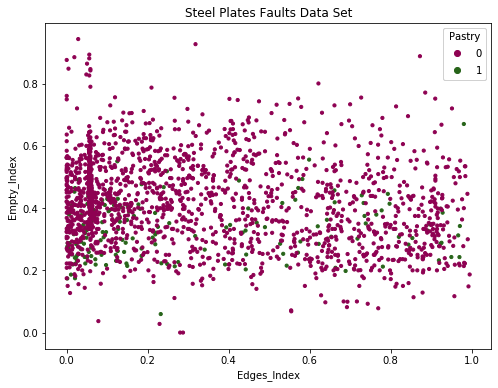

In [17]:
plot_cluster(y)

##### Задание 5
Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.  

Алгоритмы: K-means, Affinity Propagation, Mean Shift, mini-batch K-Means

**K-means**

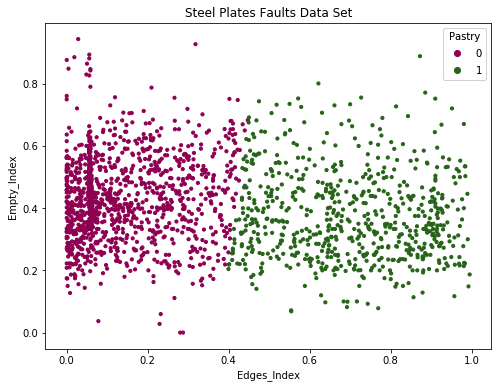

In [39]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit(X)
y_k_means = model.predict(X)

plot_cluster(y_k_means)

**Affinity Propagation**

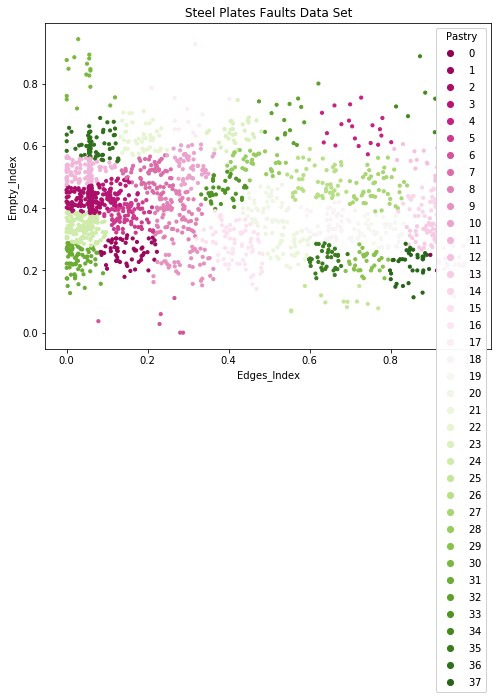

In [40]:
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(damping=0.8,random_state=0)
model.fit(X)

y_af_pr = model.predict(X)

plot_cluster(y_af_pr)

**Mean Shift**

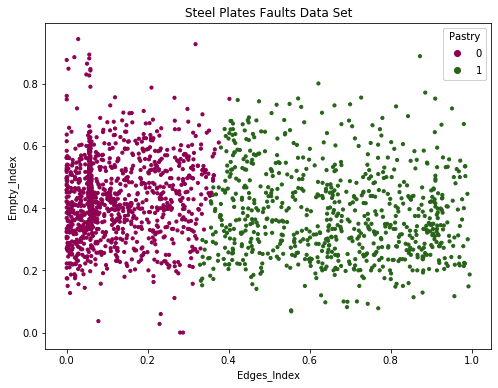

In [41]:
from sklearn.cluster import MeanShift

model = MeanShift()
y_m_sh = model.fit_predict(X)

plot_cluster(y_m_sh)

**Mini-batch K-Means**

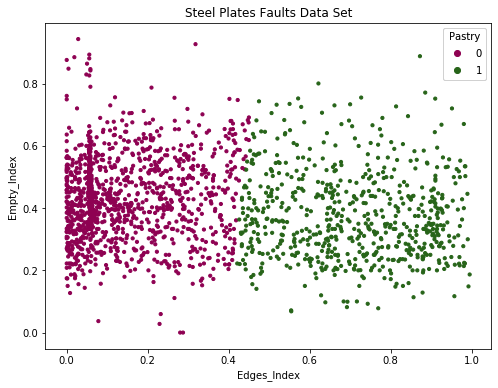

In [42]:
from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(n_clusters=2)
model.fit(X)

y_b_k_means = model.predict(X)

plot_cluster(y_b_k_means)

##### Задание 6
Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию `contingency_matrix()` из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании.  

Меры качества: F-мера, парные меры TP, FN, FP, TN, индекс Жаккара

**F-мера** кластеризации $\mathcal{C}$ определяется как среднее значение показателей F-мер кластеров:

$F=\frac{1}{r}\sum_{j=1}^{r}F_{j}, F_{j}=\frac{2n_{i_{j}j}}{n_{i_{j}}+m_{j}}$

In [133]:
def f_score(matrix):
    F = 0
    for j in range(len(matrix[0])):
        m_j = 0
        n_i_jj = 0
        for i in range (len(matrix)):
            m_j += matrix[i][j]
            if n_i_jj < matrix[i][j]:
                n_i_jj = matrix[i][j]
                n_ij = matrix[i].sum()
        F += 2*n_i_jj/(n_ij+m_j)
    return F/len(matrix[0])

**Парные меры:**

In [134]:
def pair_score(matrix):
    n = matrix.sum()
    
    # нахождение TP
    tp = 0
    for i in range (len(matrix)):
        for j in range(len(matrix[0])):
            tp += pow(matrix[i][j], 2)
    tp = (tp-n)/2
    
    # нахождение FN
    fn = 0
    for i in range (len(matrix)):
        ni = matrix[i].sum()
        fn += pow(ni, 2)
    fn = (fn - n)/2 - tp
    
    # нахождение FP
    fp = 0
    for j in range(len(matrix[0])):
        mj = 0
        for i in range(len(matrix)):
            mj += matrix[i][j]
        fp += pow(mj, 2)
    fp = (fp - n)/2 - tp
    
    # нахождение TN
    n_ = (n*n-n)/2
    tn = n_ - (tp + fn + fp)
    
    return tp, fn, fp, tn

**Индекс Жаккара:**

In [81]:
def jaccard(tp, fn, fp):
    return tp/(tp+fn+fp)

*Для K-means*

In [135]:
from sklearn.metrics.cluster import contingency_matrix, pair_confusion_matrix

matrix_k_means = contingency_matrix(y, y_k_means)
matrix_k_means

array([[1161,  622],
       [ 108,   50]], dtype=int64)

In [136]:
print("F-мера =", f_score(matrix_k_means))
tp, fp, fn, tn = pair_score(matrix_k_means)
print("TP =", tp)
print("FP =", fp)
print("FN =", fn)
print("TN =", tn)
print("Индекс Жаккара =", jaccard(tp, fn, fp))

F-мера = 0.6337667797551203
TP = 873514.0
FP = 727542.0
FN = 156488.0
TN = 125226.0
Индекс Жаккара = 0.497008325253877


*Для Affinity Propagation*

In [128]:
matrix_af_pr = contingency_matrix(y, y_af_pr)
matrix_af_pr

array([[ 20,  42, 218,  50,  20,  65,   5,  66,  72,  35,  55, 140,  28,
         46,  43,  35,  34,  13,  41,  43,  41,  32,  51,  32, 122,  12,
         43,  42,  36,  31,  17,  49,  16,  37,   8,  36,  71,  36],
       [  3,  17,   9,   5,   0,  12,   1,   3,   6,   5,   0,   2,   0,
          8,   2,   4,   3,   0,   4,   5,   4,   5,   0,   0,  19,   0,
          5,   5,   0,   2,   0,  24,   0,   1,   1,   2,   1,   0]],
      dtype=int64)

In [137]:
print("F-мера =", f_score(matrix_af_pr))
tp, fp, fn, tn = pair_score(matrix_af_pr)
print("TP =", tp)
print("FP =", fp)
print("FN =", fn)
print("TN =", tn)
print("Индекс Жаккара =", jaccard(tp, fn, fp))

F-мера = 0.05030596381519122
TP = 70076.0
FP = 1530980.0
FN = 10424.0
TN = 271290.0
Индекс Жаккара = 0.043485491597785884


*Для Mean Shift*

In [138]:
matrix_m_sh = contingency_matrix(y, y_m_sh)
matrix_m_sh

array([[1077,  706],
       [ 103,   55]], dtype=int64)

In [139]:
print("F-мера =", f_score(matrix_m_sh))
tp, fp, fn, tn = pair_score(matrix_m_sh)
print("TP =", tp)
print("FP =", fp)
print("FN =", fn)
print("TN =", tn)
print("Индекс Жаккара =", jaccard(tp, fn, fp))

F-мера = 0.6409986797334846
TP = 835029.0
FP = 766027.0
FN = 149761.0
TN = 131953.0
Индекс Жаккара = 0.47693676723495376


*Для Mini-batch K-Means*

In [141]:
matrix_b_k_means = contingency_matrix(y, y_b_k_means)
matrix_b_k_means

array([[1181,  602],
       [ 108,   50]], dtype=int64)

In [142]:
print("F-мера =", f_score(matrix_b_k_means))
tp, fp, fn, tn = pair_score(matrix_b_k_means)
print("TP =", tp)
print("FP =", fp)
print("FN =", fn)
print("TN =", tn)
print("Индекс Жаккара =", jaccard(tp, fn, fp))

F-мера = 0.6316680302446954
TP = 884694.0
FP = 716362.0
FN = 157648.0
TN = 124066.0
Индекс Жаккара = 0.5030374639507273


##### Задание 7
Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.  

Найти лучший алгоритм кластеризации относительно меры качества: индекс Жаккара 

In [143]:
print("F-мера K-Means =", f_score(matrix_k_means))
print("F-мера Affinity Propagation =", f_score(matrix_af_pr))
print("F-мера Mean Shift =", f_score(matrix_m_sh))
print("F-мера Mini-batch K-Means =", f_score(matrix_b_k_means))

F-мера K-Means = 0.6337667797551203
F-мера Affinity Propagation = 0.05030596381519122
F-мера Mean Shift = 0.6409986797334846
F-мера Mini-batch K-Means = 0.6316680302446954


Оптимальный алгоритм - Mean Shift

##### Задание 8
Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

In [153]:
model = MeanShift()
model.fit(X)

MeanShift()

In [1]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(figsize=(16,12))
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap='PiYG',
    alpha = 0.5,
    aspect="auto",
    origin="lower",
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='PiYG')

# Plot the centroids as a X
centers = model.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="x",
    s=500,
    lw=5,
    color="w"
)
plt.title("Визуализация областей принятия решений при кластеризации методом Mean Shift")
plt.xlabel("Edges_Index")
plt.ylabel("Empty_Index")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(());

NameError: name 'X' is not defined